# Assignment 1

##### Ksenia Romanova 

In [1]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 2.1 MB/s eta 0:00:01    |████                            | 3.1 MB 763 kB/s eta 0:00:28     |██████▌                         | 4.9 MB 628 kB/s eta 0:00:31
  Using cached smart_open-2.2.1.tar.gz (122 kB)
  Using cached boto3-1.15.13.tar.gz (97 kB)
  Using cached botocore-1.18.13-py2.py3-none-any.whl (6.7 MB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
  Created wheel for smart-open: filename=smart_open-2.2.1-py3-none-any.whl size=114113 sha256=be2d2385dbe4e8b3725f1a7ef80a2ce230707b5bb2bc366580b2584eef53db6a
  Stored in directory: /Users/Xenia/Library/Caches/pip/wheels/b6/6a/26/b0a146ee7d0fca1a80ee870ec234c455d704249f2bab1f8809
  Created wheel for boto3: filename=boto3-1.15.13-py2.py3-none-any.whl size=127861 sha256=f8aad8b3a079588855701bd325c2ab057efb1fe5105a420d90dc0b7a66256c73
  Stored in directory: /Users/Xenia/Library/Caches/pip/wheels/56/42/26/78fbbae1689c7a75

In [5]:
!pip install pymystem3

  Using cached pymystem3-0.2.0-py3-none-any.whl (10 kB)


In [6]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 774 kB/s eta 0:00:01
Processing ./Library/Caches/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e/docopt-0.6.2-py2.py3-none-any.whl
     |████████████████████████████████| 8.0 MB 350 bytes/s  0:00:01     |███████████▉                    | 3.0 MB 2.4 MB/s eta 0:00:03     |██████████████▎                 | 3.6 MB 2.4 MB/s eta 0:00:02     |████████████████████▌           | 5.1 MB 1.8 MB/s eta 0:00:02     |████████████████████████████████| 8.0 MB 2.5 MB/s eta 0:00:01
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)


### 1. Choose a long text (a novel), do preprocessing on it (delete punctuation, lemmatize it) -- 2 points 

In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
from tqdm import tqdm
from pymystem3 import Mystem

m = Mystem()
sw = stopwords.words('russian')

with open('didiot.txt', 'r', encoding='utf8') as f:
    text = f.readlines()

new_lines = []

for line in tqdm(text):
    line = ' '.join([w for w in line.split() if w not in sw])
    newline = ''.join(m.lemmatize(line))
    new_lines.append(newline)
        
with open('didiot_lem.txt', 'w', encoding='utf8') as f1:
    for line in new_lines:
        f1.write(line)

100%|██████████| 4599/4599 [00:11<00:00, 395.11it/s]


In [4]:
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''

with open('didiot_lem.txt', 'r', encoding='utf8') as f11:
    text_punc = f11.read()

#new_lines_no_punc = []

#for line in text_pinc:
for ele in text_punc: #line: 
    if ele in punc: 
        text_punc = text_punc.replace(ele, " ") 
        #new_lines_no_punc.append(newline)

with open('didiot_lem_nopunc.txt', 'w', encoding='utf8') as f111:
    #for line in new_lines_no_punc:
    f111.write(text_punc) #(line)


`didiot_lem_nopunc.txt` is lemmatized and no punctuation `.txt` file with the text of Dostoyevsky's Idiot novel. 

### 2. Train a word2vec model on the chosen text, set the parameters (window size, vector size, number of iterations etc.), comment on your choice of parameter settings and the reasoning behind it -- 3 points (1 point for the model, 2 points for the comments) 

In [5]:
f = 'didiot_lem_nopunc.txt'
data = gensim.models.word2vec.LineSentence(f)

In [38]:
%time model_didiot = gensim.models.Word2Vec(data, size=300, window=10, min_count=2, iter=50)

2020-10-08 03:01:17,246 : INFO : collecting all words and their counts
2020-10-08 03:01:17,249 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-08 03:01:17,341 : INFO : collected 10430 word types from a corpus of 122906 raw words and 4599 sentences
2020-10-08 03:01:17,342 : INFO : Loading a fresh vocabulary
2020-10-08 03:01:17,361 : INFO : effective_min_count=2 retains 6411 unique words (61% of original 10430, drops 4019)
2020-10-08 03:01:17,362 : INFO : effective_min_count=2 leaves 118887 word corpus (96% of original 122906, drops 4019)
2020-10-08 03:01:17,389 : INFO : deleting the raw counts dictionary of 10430 items
2020-10-08 03:01:17,390 : INFO : sample=0.001 downsamples 40 most-common words
2020-10-08 03:01:17,391 : INFO : downsampling leaves estimated 109148 word corpus (91.8% of prior 118887)
2020-10-08 03:01:17,415 : INFO : estimated required memory for 6411 words and 300 dimensions: 18591900 bytes
2020-10-08 03:01:17,417 : INFO : resetting la

2020-10-08 03:01:24,787 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-08 03:01:24,788 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-08 03:01:24,789 : INFO : EPOCH - 18 : training on 122906 raw words (109139 effective words) took 0.2s, 461759 effective words/s
2020-10-08 03:01:25,012 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-08 03:01:25,028 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-08 03:01:25,035 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-08 03:01:25,036 : INFO : EPOCH - 19 : training on 122906 raw words (109086 effective words) took 0.2s, 448355 effective words/s
2020-10-08 03:01:25,286 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-08 03:01:25,290 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-08 03:01:25,304 : INFO : worker thread finished; awaiting finish of 0 more threads


2020-10-08 03:01:31,519 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-08 03:01:31,520 : INFO : EPOCH - 38 : training on 122906 raw words (109104 effective words) took 0.4s, 307698 effective words/s
2020-10-08 03:01:31,826 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-08 03:01:31,834 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-08 03:01:31,841 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-08 03:01:31,842 : INFO : EPOCH - 39 : training on 122906 raw words (109046 effective words) took 0.3s, 355077 effective words/s
2020-10-08 03:01:32,159 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-08 03:01:32,166 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-08 03:01:32,181 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-08 03:01:32,183 : INFO : EPOCH - 40 : training on 122906 raw words (109051 effectiv

CPU times: user 39.6 s, sys: 794 ms, total: 40.4 s
Wall time: 18.2 s


#### Comment: 

- `data` is preprocessed lemmarized `.txt`-file from the previous part; 
- `size` is $300$, grater number would not make it better; 
- `window size` is $5-8$ since it shows the better accuracy from that interval, (at, let's say, $10$ accuracy is not much better); 
- `min_count` is $2$ to cut off too rare words which seem to be more occasional, (a run with *min_count*$=0$ resulted the number of words $10430$, there are also may be French words used in epigraph quotations); 
- `sg`, I leave in a default parameter since it goes well with relatively small data; 
- `sample` is left at the defaul value; 
- `negative` is left default (equals $5$); 
- `iter` equals $50$ because at this point it reaches the top accuracy; 
- I set no limitation for `max_vocab_size` because I do not expect it to be that big, (even the size of the original text is $214`314$ words). 


In [39]:
model_didiot.init_sims(replace=True)
model_path = "didiot.bin"

print("Saving model...")
model_didiot.wv.save_word2vec_format(model_path, binary=True)

2020-10-08 03:02:17,261 : INFO : precomputing L2-norms of word weight vectors
2020-10-08 03:02:17,276 : INFO : storing 6411x300 projection weights into didiot.bin


Saving model...


In [40]:
# number of words 
print(len(model_didiot.wv.vocab))

6411


### 3. Test your model, use most_similar, similarity, doesnt_match functions, comment on the model performance -- 3 points (1 point for the use of the functions, 2 points for the comments and reasoning behind the testing)

##### most_similar 

In [45]:
model_didiot.wv.most_similar("настасья", topn=3)

[('чисто', 0.44975095987319946),
 ('тоцкий', 0.4215039610862732),
 ('барашков', 0.408893346786499)]

In [47]:
model_didiot.wv.most_similar("лев", topn=3)

[('николаевич', 0.8946851491928101),
 ('николаич', 0.8208207488059998),
 ('басня', 0.6318966150283813)]

In [48]:
model_didiot.wv.most_similar("идиот", topn=3)

[('уметь', 0.5131288170814514),
 ('душонка', 0.5047910213470459),
 ('старикашка', 0.4966288208961487)]

In [49]:
model_didiot.wv.most_similar("честный", topn=3)

[('благородный', 0.555116593837738),
 ('любовница', 0.5367225408554077),
 ('не', 0.5362522006034851)]

In [71]:
model_didiot.wv.most_similar("любовь", topn=5)

[('любить', 0.6432786583900452),
 ('жалость', 0.6384543776512146),
 ('жестокость', 0.5909203886985779),
 ('гордость', 0.5688411593437195),
 ('сострадание', 0.5667636394500732)]

In [51]:
model_didiot.wv.most_similar("честь", topn=3)

[('оружие', 0.5518025755882263),
 ('удостоить', 0.5451244711875916),
 ('экземпляр', 0.5443816184997559)]

In [53]:
model_didiot.wv.most_similar("глупый", topn=3)

[('добрый', 0.5591087937355042),
 ('глупо', 0.5367403626441956),
 ('невинный', 0.5285898447036743)]

In [56]:
model_didiot.wv.most_similar("правый", topn=3)

[('ладонь', 0.6917517185211182),
 ('крепко', 0.62564617395401),
 ('сжимать', 0.6214070916175842)]

In [67]:
model_didiot.wv.most_similar("нож", topn=3)

[('класть', 0.6635871529579163),
 ('вода', 0.6531194448471069),
 ('щипцы', 0.641416072845459)]

In [89]:
model_didiot.wv.most_similar("встреча", topn=5)

[('внезапный', 0.5888667106628418),
 ('впечатление', 0.5888392329216003),
 ('видеться', 0.5828084945678711),
 ('мучительный', 0.5776416063308716),
 ('вспоминаться', 0.5699927806854248)]

In [70]:
model_didiot.wv.most_similar(positive=["любовь"], topn=5)

[('любить', 0.6432786583900452),
 ('жалость', 0.6384543776512146),
 ('жестокость', 0.5909203886985779),
 ('гордость', 0.5688411593437195),
 ('сострадание', 0.5667636394500732)]

In [72]:
model_didiot.wv.most_similar(negative=["любовь"], topn=5)

[('вакхический', 0.4842985272407532),
 ('будить', 0.47418707609176636),
 ('публика', 0.4689405560493469),
 ('пересаживаться', 0.4614849090576172),
 ('кол', 0.4529187083244324)]

In [68]:
model_didiot.wv.most_similar(negative=["нож"], topn=3)

[('весьма', 0.5154138803482056),
 ('обстоятельство', 0.5079464316368103),
 ('порождать', 0.5024181604385376)]

In [69]:
model_didiot.wv.most_similar(positive=["нож"], topn=3)

[('класть', 0.6635871529579163),
 ('вода', 0.6531194448471069),
 ('щипцы', 0.641416072845459)]

In [74]:
model_didiot.wv.most_similar(positive=["любовь"], negative=["петербург"], topn=5)

[('жестокость', 0.6044210195541382),
 ('сострадание', 0.5950920581817627),
 ('унижать', 0.5828839540481567),
 ('жалость', 0.5657812356948853),
 ('страдать', 0.5648155212402344)]

In [75]:
model_didiot.wv.most_similar(positive=["настасья", "письмо"], negative=["петербург"], topn=5)

[('осмеливаться', 0.5085556507110596),
 ('деликатность', 0.44281643629074097),
 ('безумный', 0.43197470903396606),
 ('краснеть', 0.4247952997684479),
 ('кинуть', 0.42126911878585815)]

In [76]:
model_didiot.wv.most_similar(positive=["письмо"], negative=["петербург"], topn=5)

[('осмеливаться', 0.6156102418899536),
 ('вслух', 0.523723840713501),
 ('безумный', 0.4974556267261505),
 ('анонимный', 0.49420103430747986),
 ('написать', 0.4892237186431885)]

In [81]:
model_didiot.wv.most_similar(positive=["письмо", "петербург"], topn=5)

[('приезд', 0.6854239702224731),
 ('получать', 0.6412754058837891),
 ('салазкин', 0.5936119556427002),
 ('выезд', 0.5718427300453186),
 ('подробный', 0.569506049156189)]

In [85]:
model_didiot.wv.most_similar(positive=["написать"], negative=["петербург"], topn=5)

[('осмеливаться', 0.5705132484436035),
 ('каллиграф', 0.5691664218902588),
 ('прочитывать', 0.5080501437187195),
 ('больше', 0.5044369697570801),
 ('вслух', 0.4929630160331726)]

In [88]:
model_didiot.wv.most_similar(positive=["удивление"], negative=["печальный"], topn=5)

[('грозно', 0.5491936206817627),
 ('недоумение', 0.5161395072937012),
 ('пристально', 0.5107697248458862),
 ('расхохотаться', 0.5036657452583313),
 ('портрет', 0.4917711317539215)]

In [112]:
model_didiot.wv.most_similar("кутеж", topn=7)

[('убыток', 0.657443106174469),
 ('почесть', 0.6253799200057983),
 ('малодушие', 0.6170972585678101),
 ('ничтожный', 0.5967755317687988),
 ('здравый', 0.5851949453353882),
 ('исповедь', 0.5844656229019165),
 ('нравственный', 0.5818561315536499)]

In [115]:
model_didiot.wv.most_similar(negative=["кутеж", "исповедь"], topn=5)

[('разговаривать', 0.5198025107383728),
 ('поглядывать', 0.5195931196212769),
 ('выползать', 0.495477557182312),
 ('внимательно', 0.49100643396377563),
 ('переглядываться', 0.48667657375335693)]

In [143]:
model_didiot.wv.most_similar("состояние", topn=7)

[('знание', 0.6284270286560059),
 ('болезненный', 0.6182923316955566),
 ('партия', 0.6174362897872925),
 ('непосредственный', 0.6077578067779541),
 ('воспаление', 0.5922783613204956),
 ('каторга', 0.5891556739807129),
 ('наружность', 0.585380494594574)]

##### similarity 

In [46]:
model_didiot.wv.similarity("настасья", "тоцкий")

0.42150396

In [91]:
model_didiot.wv.similarity("настасья", "барашков") 

0.40889335

In [92]:
model_didiot.wv.similarity("мышкин", "лев")

0.44026095

In [90]:
model_didiot.wv.similarity("встреча", "поезд")

0.14817065

In [93]:
model_didiot.wv.similarity("встреча", "разговор")

0.07066609

In [94]:
model_didiot.wv.similarity("разговор", "встреча")

0.07066609

In [95]:
model_didiot.wv.similarity("николаевич", "николаич")

0.7747731

In [99]:
model_didiot.wv.similarity("нож", "смерть")

0.047673024

In [102]:
model_didiot.wv.similarity("нож", "убивать")

0.43045372

In [98]:
model_didiot.wv.similarity("красота", "любовь")

0.39260972

In [103]:
model_didiot.wv.similarity("кутеж", "москва")

0.08517749

In [106]:
model_didiot.wv.similarity("кутеж", "петербург")

-0.080385566

In [105]:
model_didiot.wv.similarity("москва", "петербург")

0.47728232

In [107]:
model_didiot.wv.similarity("грязь", "петербург")

-0.044667996

In [ ]:
model_didiot.wv.similarity("грязь", "петербург")

##### doesnt_match 

In [116]:
model_didiot.wv.doesnt_match("любовь красивый настасья князь".split())

'любовь'

In [118]:
model_didiot.wv.doesnt_match("николаич николаевич лев".split())

'николаич'

In [119]:
model_didiot.wv.doesnt_match("лев настасья лизавета парфен иван".split())

'настасья'

In [122]:
model_didiot.wv.doesnt_match("грязь петербург москва павловск швейцария".split())

'грязь'

In [123]:
model_didiot.wv.doesnt_match("петербург москва павловск швейцария".split())

'швейцария'

In [124]:
model_didiot.wv.doesnt_match("петербург москва".split())

'петербург'

In [129]:
model_didiot.wv.doesnt_match("москва петербург".split())

'петербург'

In [125]:
model_didiot.wv.doesnt_match("виновный убийство поезд".split())

'поезд'

In [128]:
model_didiot.wv.doesnt_match("дорога встреча петербург".split())

'встреча'

In [130]:
model_didiot.wv.doesnt_match("красота любовь смерть".split())

'смерть'

In [135]:
model_didiot.wv.doesnt_match("красота любовь смерть состояние капитал вкус".split())

'смерть'

In [136]:
model_didiot.wv.doesnt_match("красота любовь состояние капитал вкус".split())

'капитал'

In [137]:
model_didiot.wv.doesnt_match("красота любовь состояние вкус".split())

'любовь'

In [138]:
model_didiot.wv.doesnt_match("красота состояние вкус".split())

'состояние'

#### Comment: 

`most_similar` 

- The positive seems to be a default parameter since it apperat in the undefined contexts (see *любовь* and *нож*) 
- For the first names (see *настасья* and *лев*) most similar are the patronyms and the family names 

`similarity` 

- Similarity is "the cosine similarity between the vectors of the two ..." so its negative meaning reveals if the angle is more than 90•; 


`doesnt_match` 

- from the only two words the function returns every iteration the same word (see *петербург москва* and *москва петербург*). 

### 4. Visualize the results of the training and testing (one plot or one graph), comment on the visualization -- 2 points (1 point for the plot/graph, 1 point for the commentary)

In [141]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
words = ['смерть', 'любовь', 'красота', 'состояние', 'вкус', 'капитал', 'знание']
X = model_didiot[words]

In [147]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

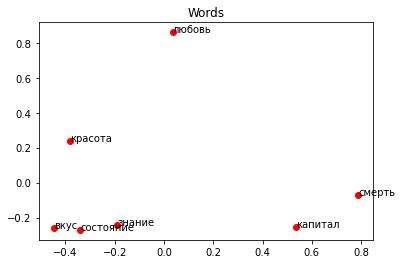

In [148]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [155]:
pca = PCA(n_components=2)
pca.fit(model_didiot[list(model_didiot.wv.vocab)])
coords = pca.transform(model_didiot[words])

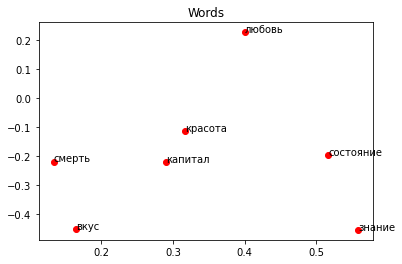

In [156]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()